dataset : https://www.kaggle.com/datasets/pavansanagapati/images-dataset

SVD

In [1]:
import numpy as np

# Step 1: Create a matrix
A = np.array([[4, 0, 2],
              [3, -5, 0],
              [1, 2, 3]])

print("Original Matrix A:\n", A)

# Step 2: Perform Singular Value Decomposition
U, Sigma, VT = np.linalg.svd(A)

print("\nU Matrix:\n", U)
print("\nSigma Values:\n", Sigma)
print("\nV^T Matrix:\n", VT)

# Step 3: Reconstruct the original matrix A
# Create a diagonal matrix for Sigma
Sigma_matrix = np.zeros((A.shape[0], A.shape[1]))
np.fill_diagonal(Sigma_matrix, Sigma)

A_reconstructed = np.dot(U, np.dot(Sigma_matrix, VT))
print("\nReconstructed Matrix A:\n", A_reconstructed)


Original Matrix A:
 [[ 4  0  2]
 [ 3 -5  0]
 [ 1  2  3]]

U Matrix:
 [[-0.47827393  0.62761889 -0.61428705]
 [-0.87677073 -0.30120166  0.37490085]
 [ 0.05027058  0.71789421  0.69433477]]

Sigma Values:
 [6.39900701 5.06748828 1.17186682]

V^T Matrix:
 [[-0.70216165  0.70079542 -0.12591581]
 [ 0.45876076  0.58052363  0.67270415]
 [-0.54452509 -0.41458183  0.72911888]]

Reconstructed Matrix A:
 [[ 4.00000000e+00  1.81120891e-15  2.00000000e+00]
 [ 3.00000000e+00 -5.00000000e+00 -1.05990893e-15]
 [ 1.00000000e+00  2.00000000e+00  3.00000000e+00]]


**single image** 

In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image


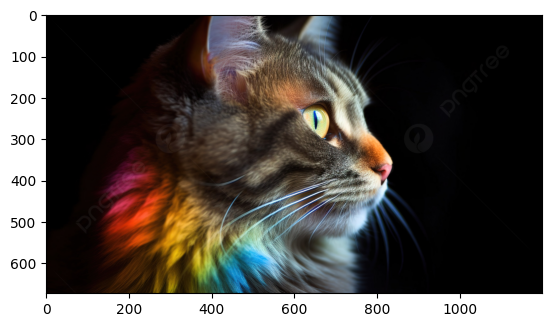

In [3]:
img = Image.open('image_1.jpg')
plt.imshow(img)

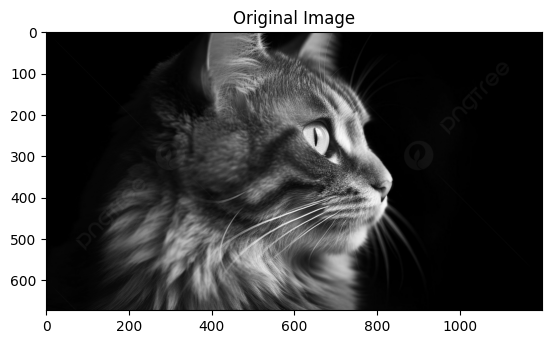

In [4]:
image = cv2.imread('image_1.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image') 
plt.show()

In [5]:
image

array([[[ 7,  7,  7],
        [ 3,  3,  3],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 4,  4,  4]],

       ...,

       [[ 1,  3, 11],
        [ 1,  3, 11],
        [ 1,  3, 11],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 1,  3, 12],
        [ 2,  3, 12],
        [ 1,  3, 12],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 7,  7,  7]],

       [[ 3,  4, 14],
        [ 0,  1, 11],
        [ 1,  2, 12],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 3,  3,  3]]], dtype=uint8)

In [6]:
image.shape

(673, 1200, 3)

In [8]:
U, Sigma, VT = np.linalg.svd(image)


In [13]:
Sigma

array([5.17259588e+04, 1.66252500e+04, 1.24084133e+04, 1.05346824e+04,
       7.99383166e+03, 6.51617241e+03, 5.89837466e+03, 5.67175920e+03,
       4.42923940e+03, 4.20638896e+03, 4.00323957e+03, 3.61894186e+03,
       3.24008472e+03, 3.12105274e+03, 2.87796224e+03, 2.59466712e+03,
       2.55797530e+03, 2.51442725e+03, 2.39383010e+03, 2.24200321e+03,
       2.23681440e+03, 2.06643004e+03, 2.02705490e+03, 2.02038879e+03,
       1.87458888e+03, 1.74039584e+03, 1.71503772e+03, 1.69192519e+03,
       1.61377573e+03, 1.58410787e+03, 1.55637942e+03, 1.52131241e+03,
       1.49638338e+03, 1.47839918e+03, 1.41252772e+03, 1.40266004e+03,
       1.39570189e+03, 1.35128066e+03, 1.27614681e+03, 1.26363207e+03,
       1.22320893e+03, 1.21062469e+03, 1.20369109e+03, 1.19182951e+03,
       1.16307541e+03, 1.14434558e+03, 1.10548187e+03, 1.09313134e+03,
       1.08112051e+03, 1.07543833e+03, 1.06831153e+03, 1.03499688e+03,
       1.00670593e+03, 9.85469262e+02, 9.74087502e+02, 9.63705146e+02,
      

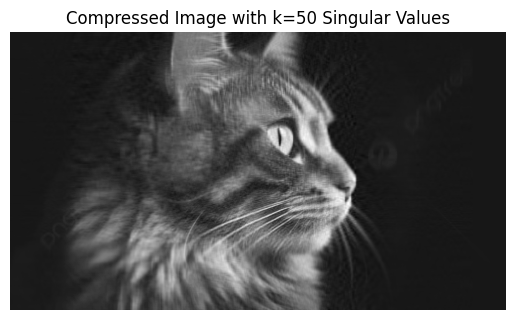

In [12]:
# Choose the number of singular values to keep
k = 50  # You can vary k to compress more or less
Sigma_matrix = np.diag(Sigma)

# Reconstruct the compressed image using the first k singular values
compressed_image = np.dot(U[:, :k], np.dot(Sigma_matrix[:k, :k], VT[:k, :]))

# Display the compressed image
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Compressed Image with k={k} Singular Values')
plt.axis('off')
plt.show()


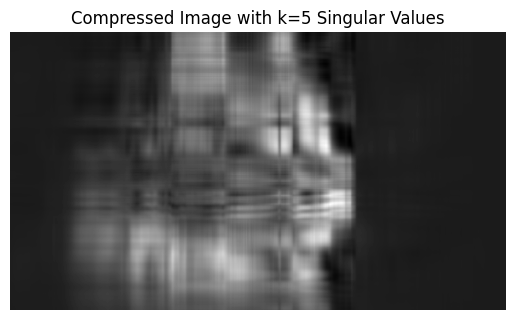

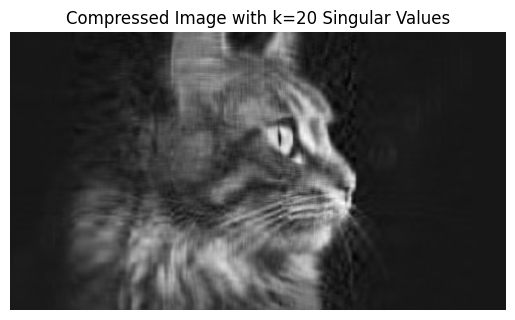

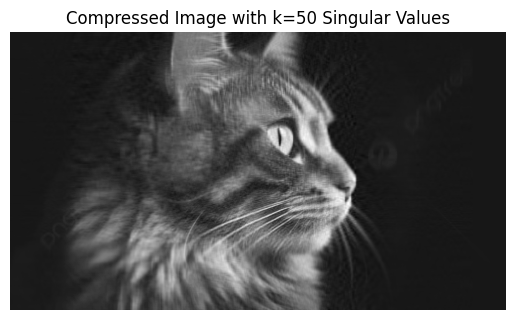

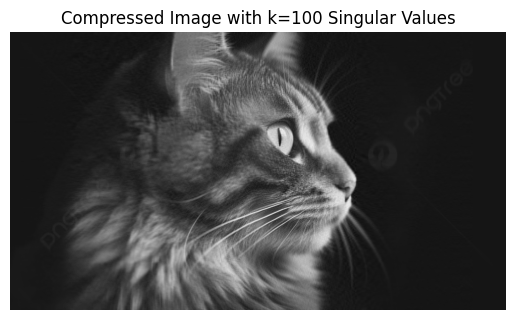

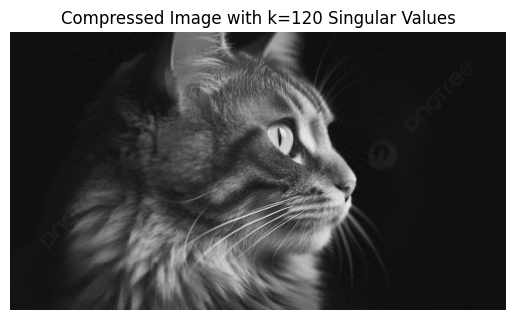

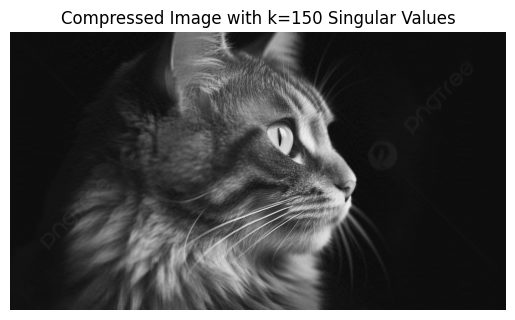

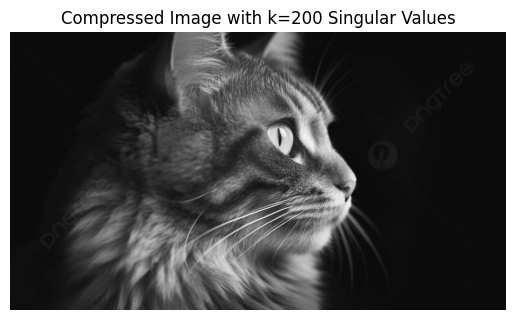

In [15]:
# Loop over different values of k
k_values = [5, 20, 50, 100, 120, 150, 200]  
for k in k_values:
    Sigma_matrix = np.diag(Sigma[:k])
    compressed_image = np.dot(U[:, :k], np.dot(Sigma_matrix, VT[:k, :]))
    
    plt.figure()
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'Compressed Image with k={k} Singular Values')
    plt.axis('off')
    plt.show()


In [17]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=e846fae96afc3cd1cd08f858cab649dc4ad76a7bd19611dba75c506991cae007
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**multiple image**

In [2]:
import os
import numpy as np
import cv2
from imutils import paths

In [3]:
imge_path = list(paths.list_images("data"))

In [4]:
imge_path

['data\\bike\\bike_001.bmp',
 'data\\bike\\bike_002.bmp',
 'data\\bike\\bike_003.bmp',
 'data\\bike\\bike_004.bmp',
 'data\\bike\\bike_005.bmp',
 'data\\bike\\bike_006.bmp',
 'data\\bike\\bike_007.bmp',
 'data\\bike\\bike_008.bmp',
 'data\\bike\\bike_009.bmp',
 'data\\bike\\bike_010.bmp',
 'data\\bike\\bike_011.bmp',
 'data\\bike\\bike_012.bmp',
 'data\\bike\\bike_013.bmp',
 'data\\bike\\bike_014.bmp',
 'data\\bike\\bike_015.bmp',
 'data\\bike\\bike_016.bmp',
 'data\\bike\\bike_017.bmp',
 'data\\bike\\bike_018.bmp',
 'data\\bike\\bike_019.bmp',
 'data\\bike\\bike_020.bmp',
 'data\\bike\\bike_021.bmp',
 'data\\bike\\bike_022.bmp',
 'data\\bike\\bike_023.bmp',
 'data\\bike\\bike_024.bmp',
 'data\\bike\\bike_025.bmp',
 'data\\bike\\bike_026.bmp',
 'data\\bike\\bike_027.bmp',
 'data\\bike\\bike_028.bmp',
 'data\\bike\\bike_029.bmp',
 'data\\bike\\bike_030.bmp',
 'data\\bike\\bike_031.bmp',
 'data\\bike\\bike_032.bmp',
 'data\\bike\\bike_033.bmp',
 'data\\bike\\bike_034.bmp',
 'data\\bike\\

In [1]:
k_values = [5, 50, 100]

for k in k_values:
    print(f'Applying SVD with k={k}')
    for image_path in image_path:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            U, Sigma, VT = np.linalg.svd(image, full_matrices=False)
            
            Sigma_matrix = np.diag(Sigma[:k])
            
            compressed_image = np.dot(U[:, :k], np.dot(Sigma_matrix, VT[:k, :]))
            
            compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)
            
            compressed_image_path = image_path.replace("data", f"data/compressed_image/k_{k}")
            os.makedirs(os.path.dirname(compressed_image_path), exist_ok=True)
            cv2.imwrite(compressed_image_path, compressed_image)
        else:
            print(f'Failed to load image: {image_path}')


Applying SVD with k=5
Applying SVD with k=50
Applying SVD with k=100


Visualizing images with k=5


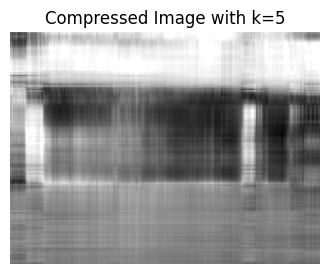

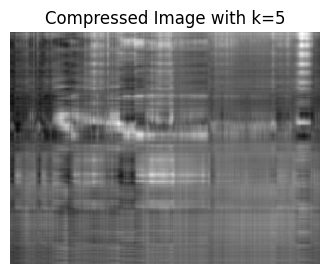

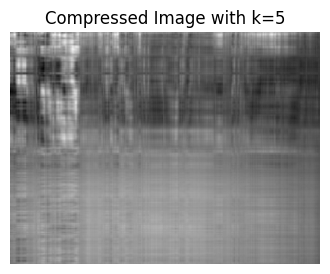

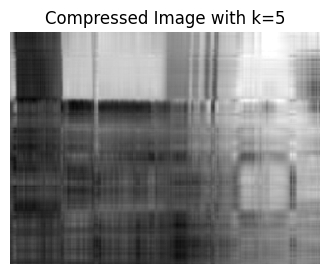

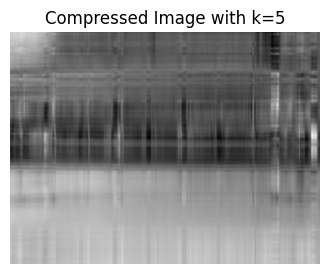

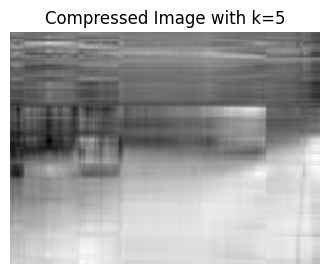

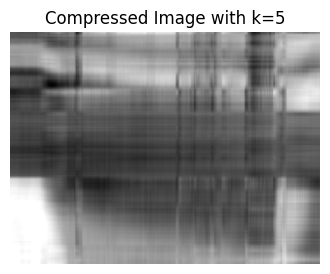

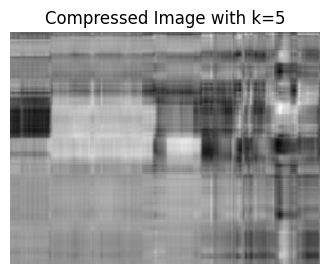

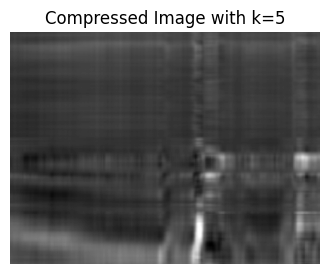

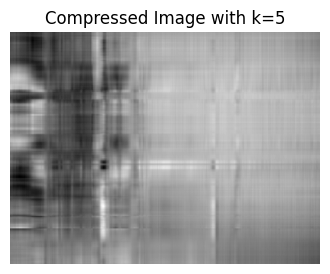

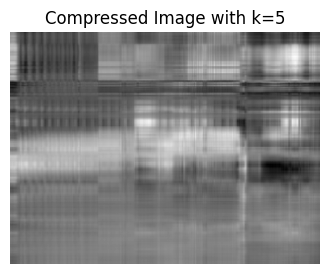

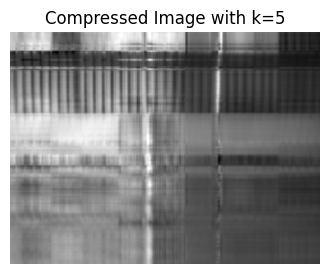

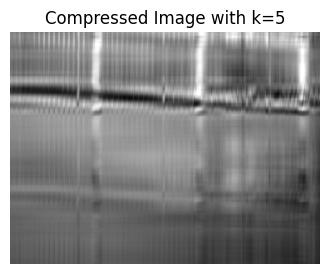

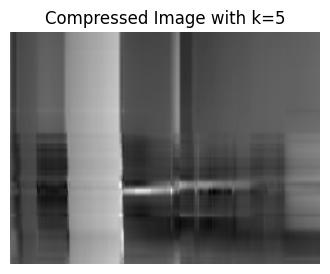

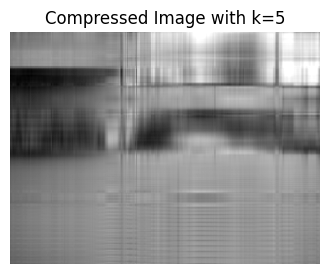

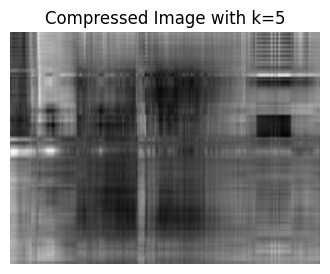

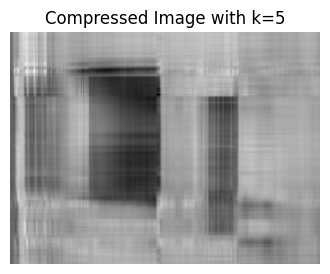

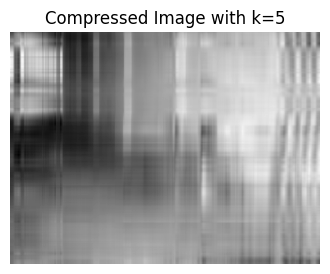

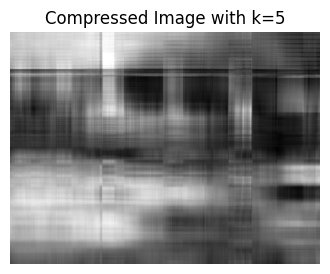

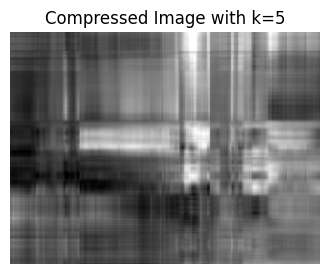

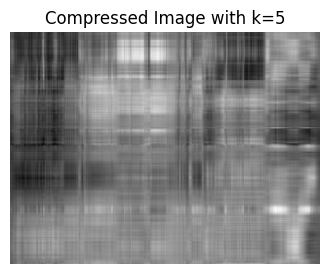

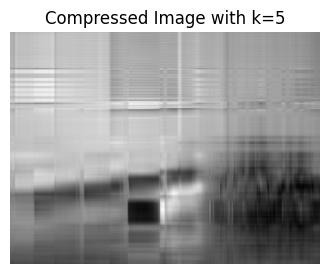

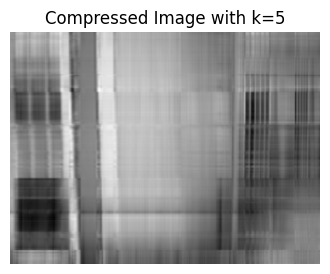

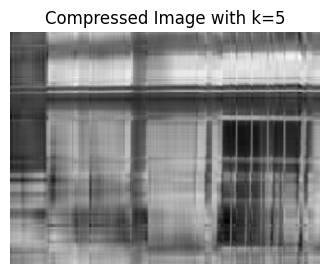

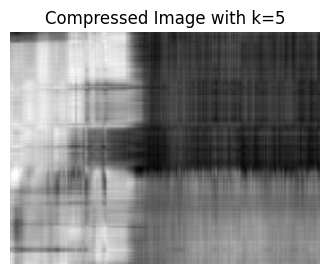

Visualizing images with k=50


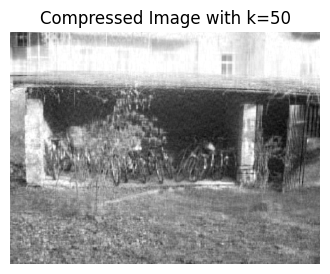

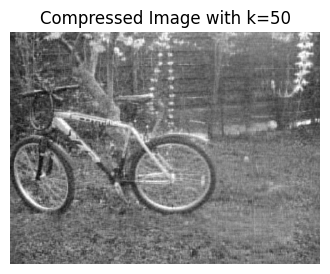

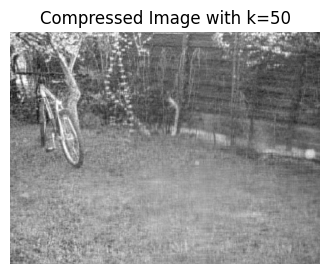

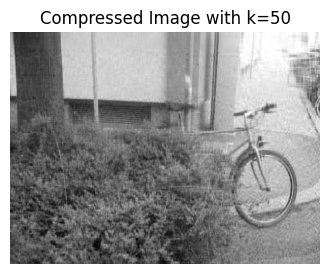

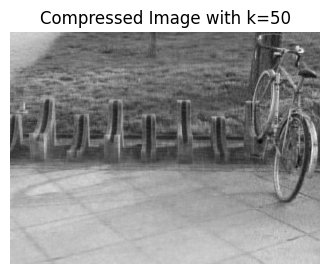

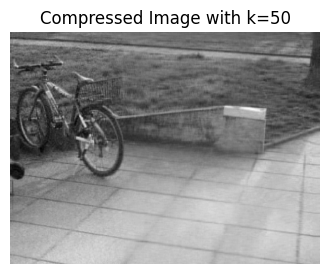

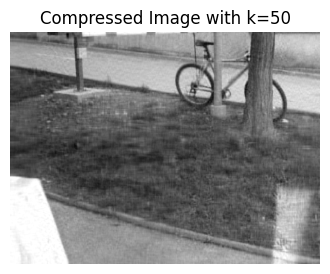

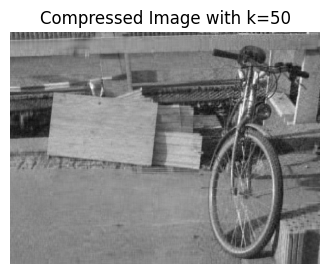

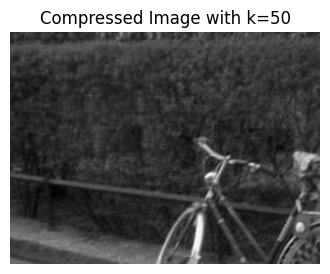

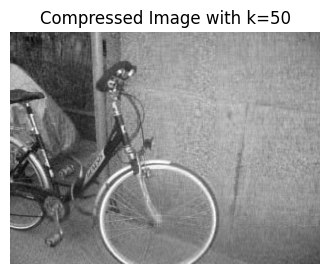

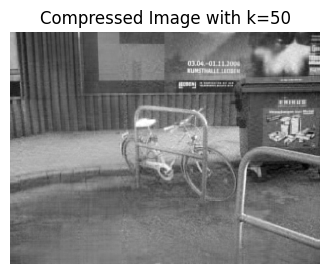

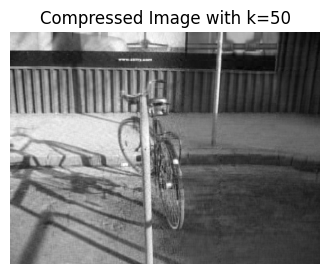

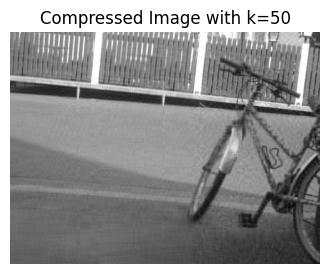

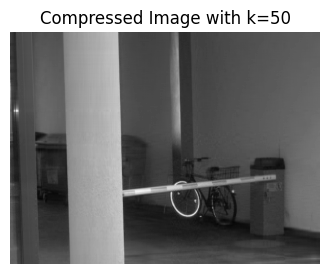

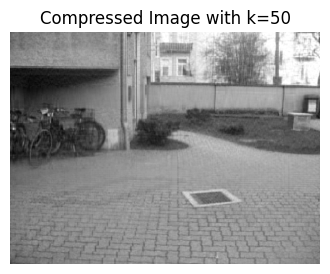

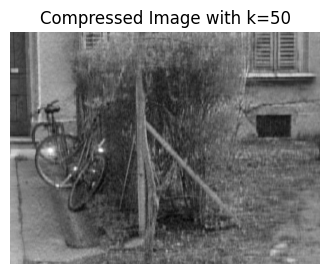

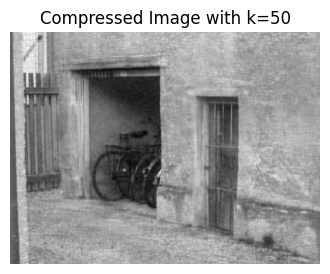

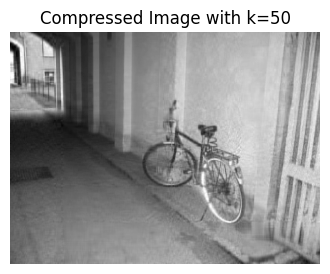

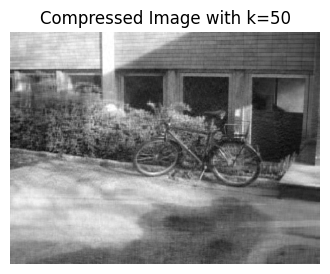

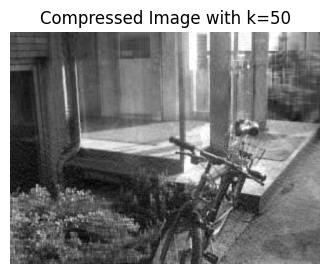

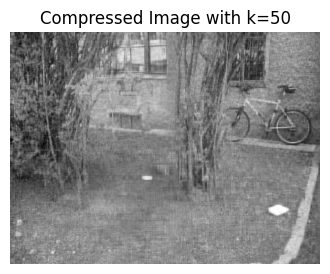

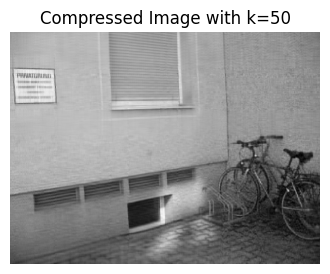

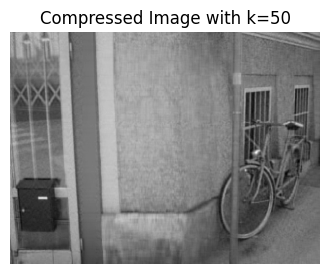

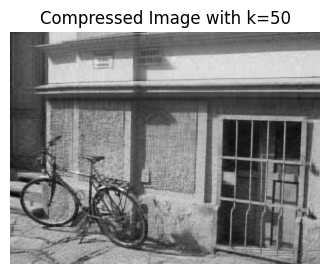

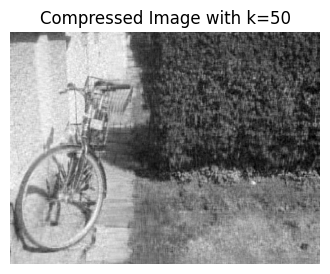

Visualizing images with k=100


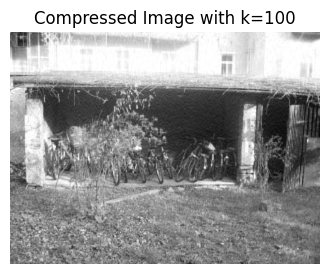

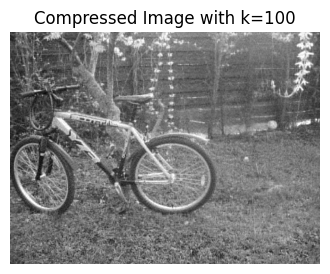

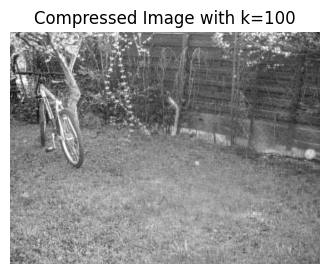

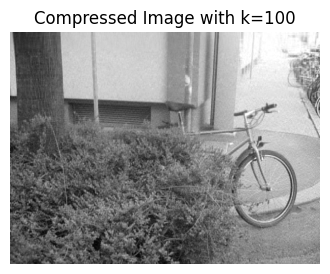

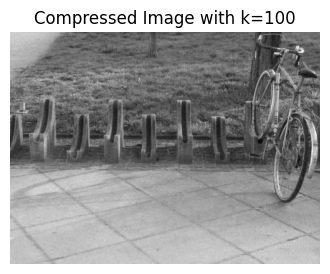

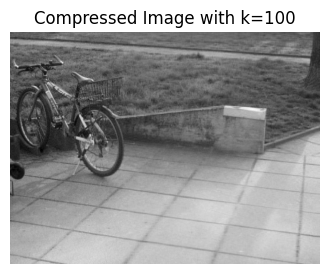

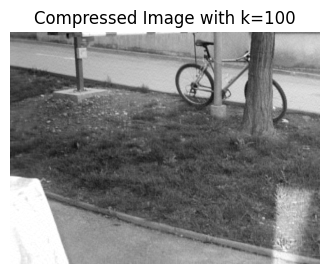

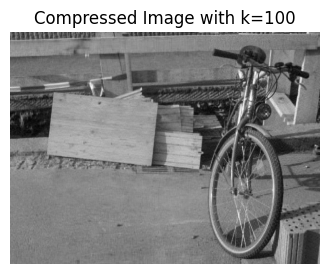

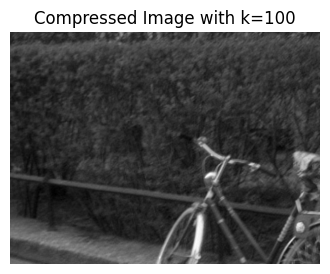

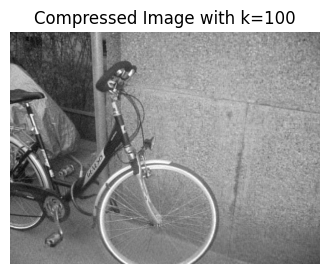

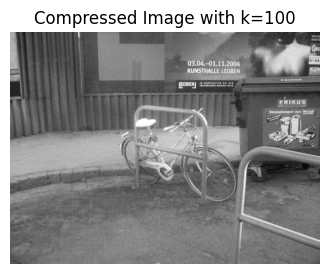

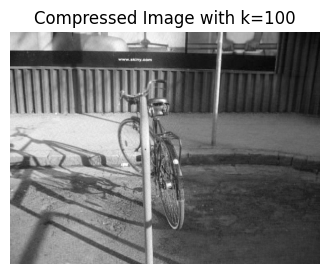

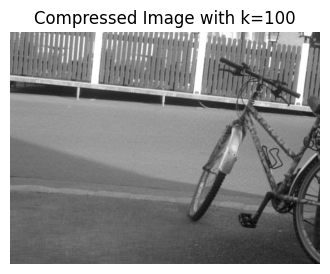

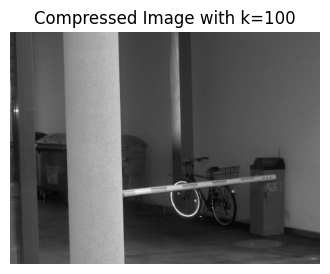

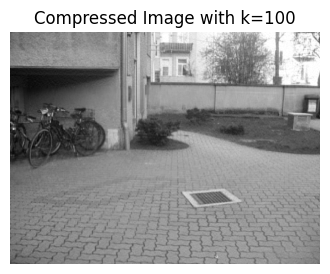

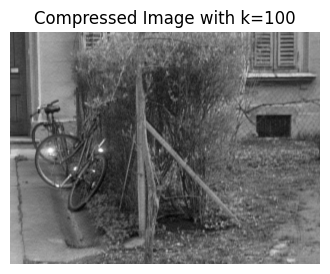

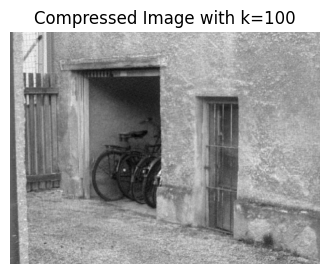

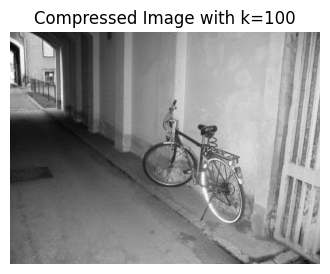

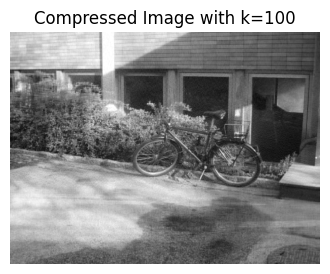

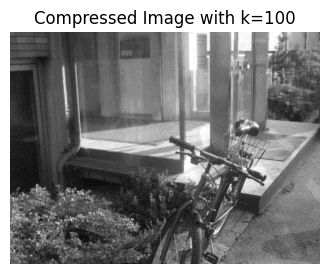

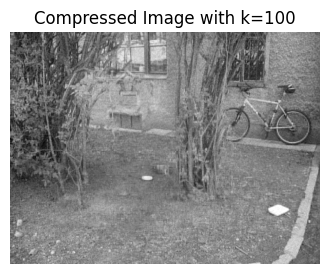

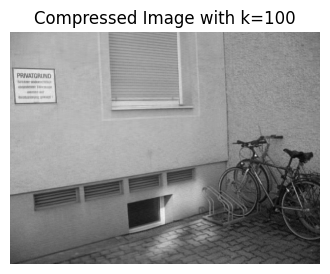

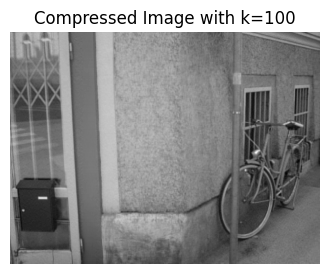

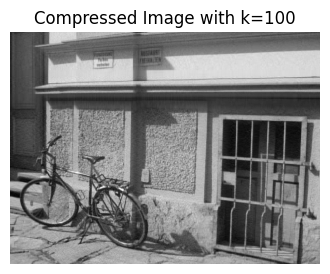

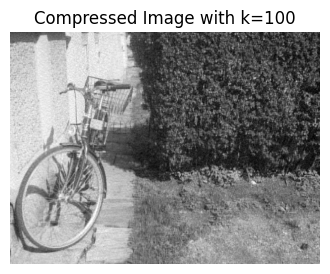

In [2]:
import os
import matplotlib.pyplot as plt
from imutils import paths

k_values = [5, 50, 100]

max_images_to_display = 25

for k in k_values:
    print(f'Visualizing images with k={k}')
    
    compressed_image_paths = list(paths.list_images(f"data/compressed_image/k_{k}"))
    
    for i, compressed_image_path in enumerate(compressed_image_paths):
        if i >= max_images_to_display:
            break
            
        compressed_image = cv2.imread(compressed_image_path, cv2.IMREAD_GRAYSCALE)
        
        if compressed_image is not None:
            plt.figure(figsize=(4, 4))
            plt.imshow(compressed_image, cmap='gray')
            plt.title(f'Compressed Image with k={k}')
            plt.axis('off')
            plt.show()
